In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Matkul Proyek DS/Proyek Baru/dataset-waterquality.xlsx')
dataset.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [ ]:
dataset.shape

(7996, 21)

In [ ]:
dataset = dataset.astype(float)

In [ ]:
dataset.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

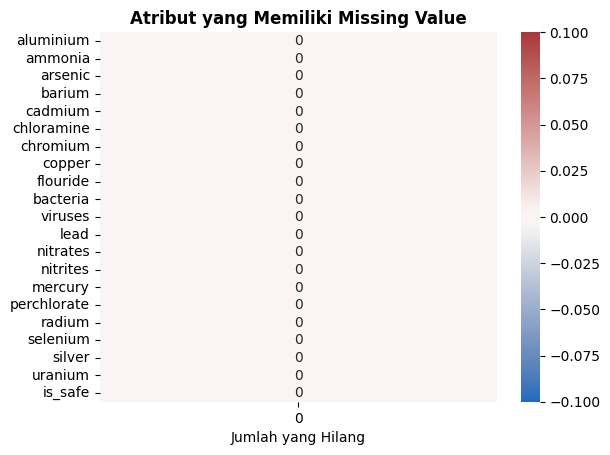

In [ ]:
# Melihat penyebaran nilai null pada masing-masing variabel
plt.title('Atribut yang Memiliki Missing Value',fontweight='bold')
ax = sns.heatmap(dataset.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Jumlah yang Hilang')
plt.show()

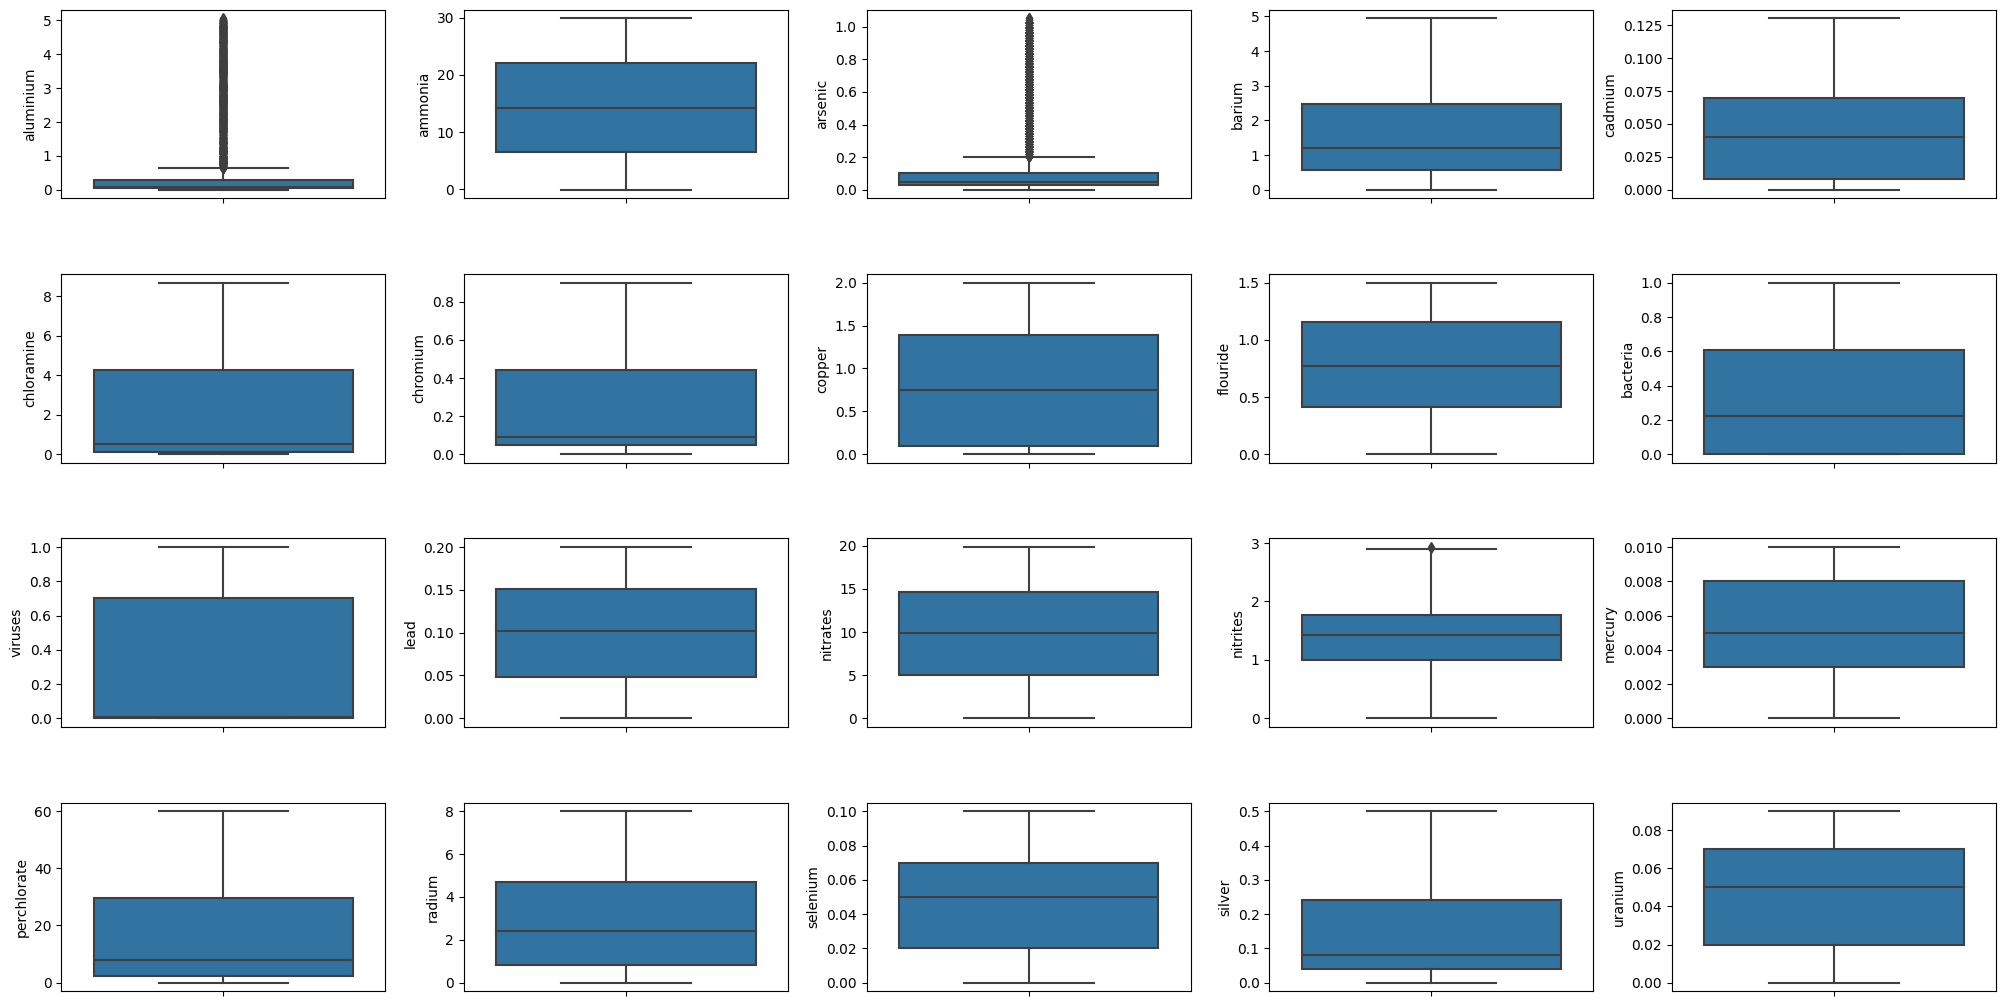

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(20,10))
count = 0
ax = ax.flatten()

list_of_num_features = dataset.columns.tolist()
list_of_num_features.remove('is_safe')

for i, feature in enumerate(list_of_num_features):
    sns.boxplot(y=feature, data=dataset, ax=ax[count])
    count += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

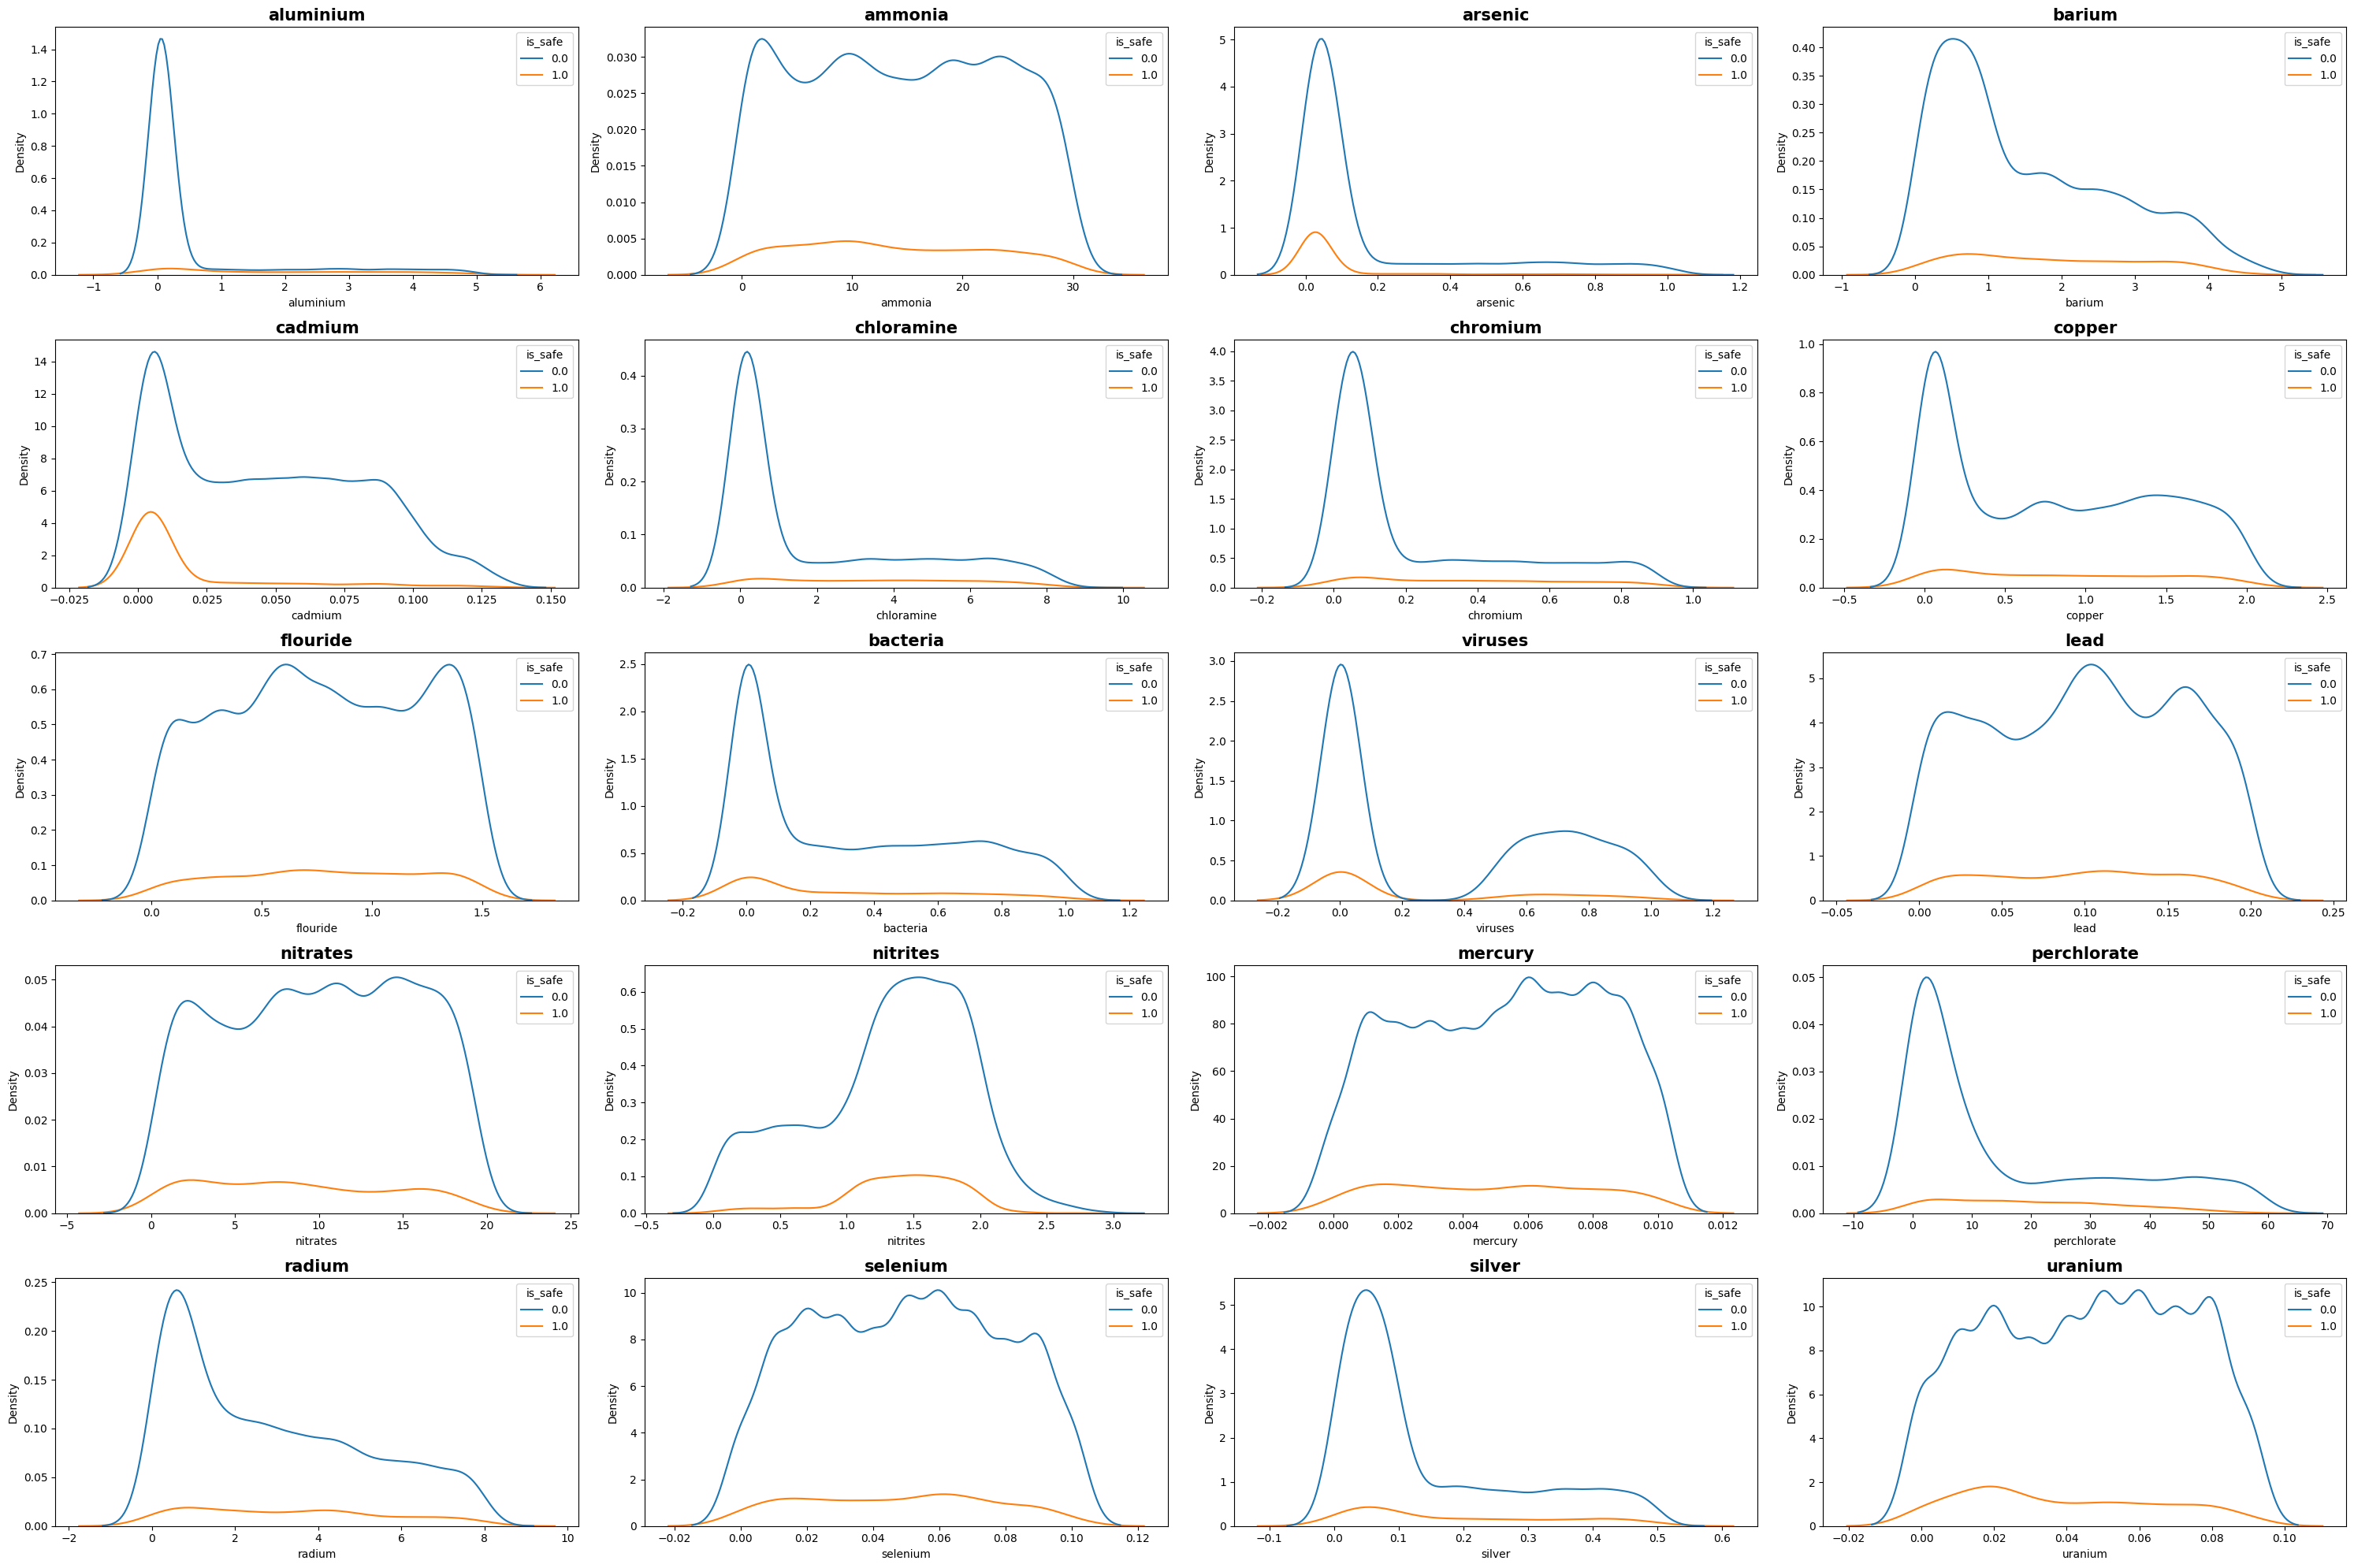

In [ ]:
fig = plt.figure(figsize=(30, 20))
j = 1
list_of_num_features = dataset.columns.tolist()
list_of_num_features.remove('is_safe')

for i, column in enumerate(list_of_num_features):
    ax = fig.add_subplot(5, 4, j)
    sns.kdeplot(x=column, data=dataset, hue='is_safe')
    ax.set_title(column, fontsize=15, fontweight='bold')
    j += 1

plt.tight_layout()
plt.show()

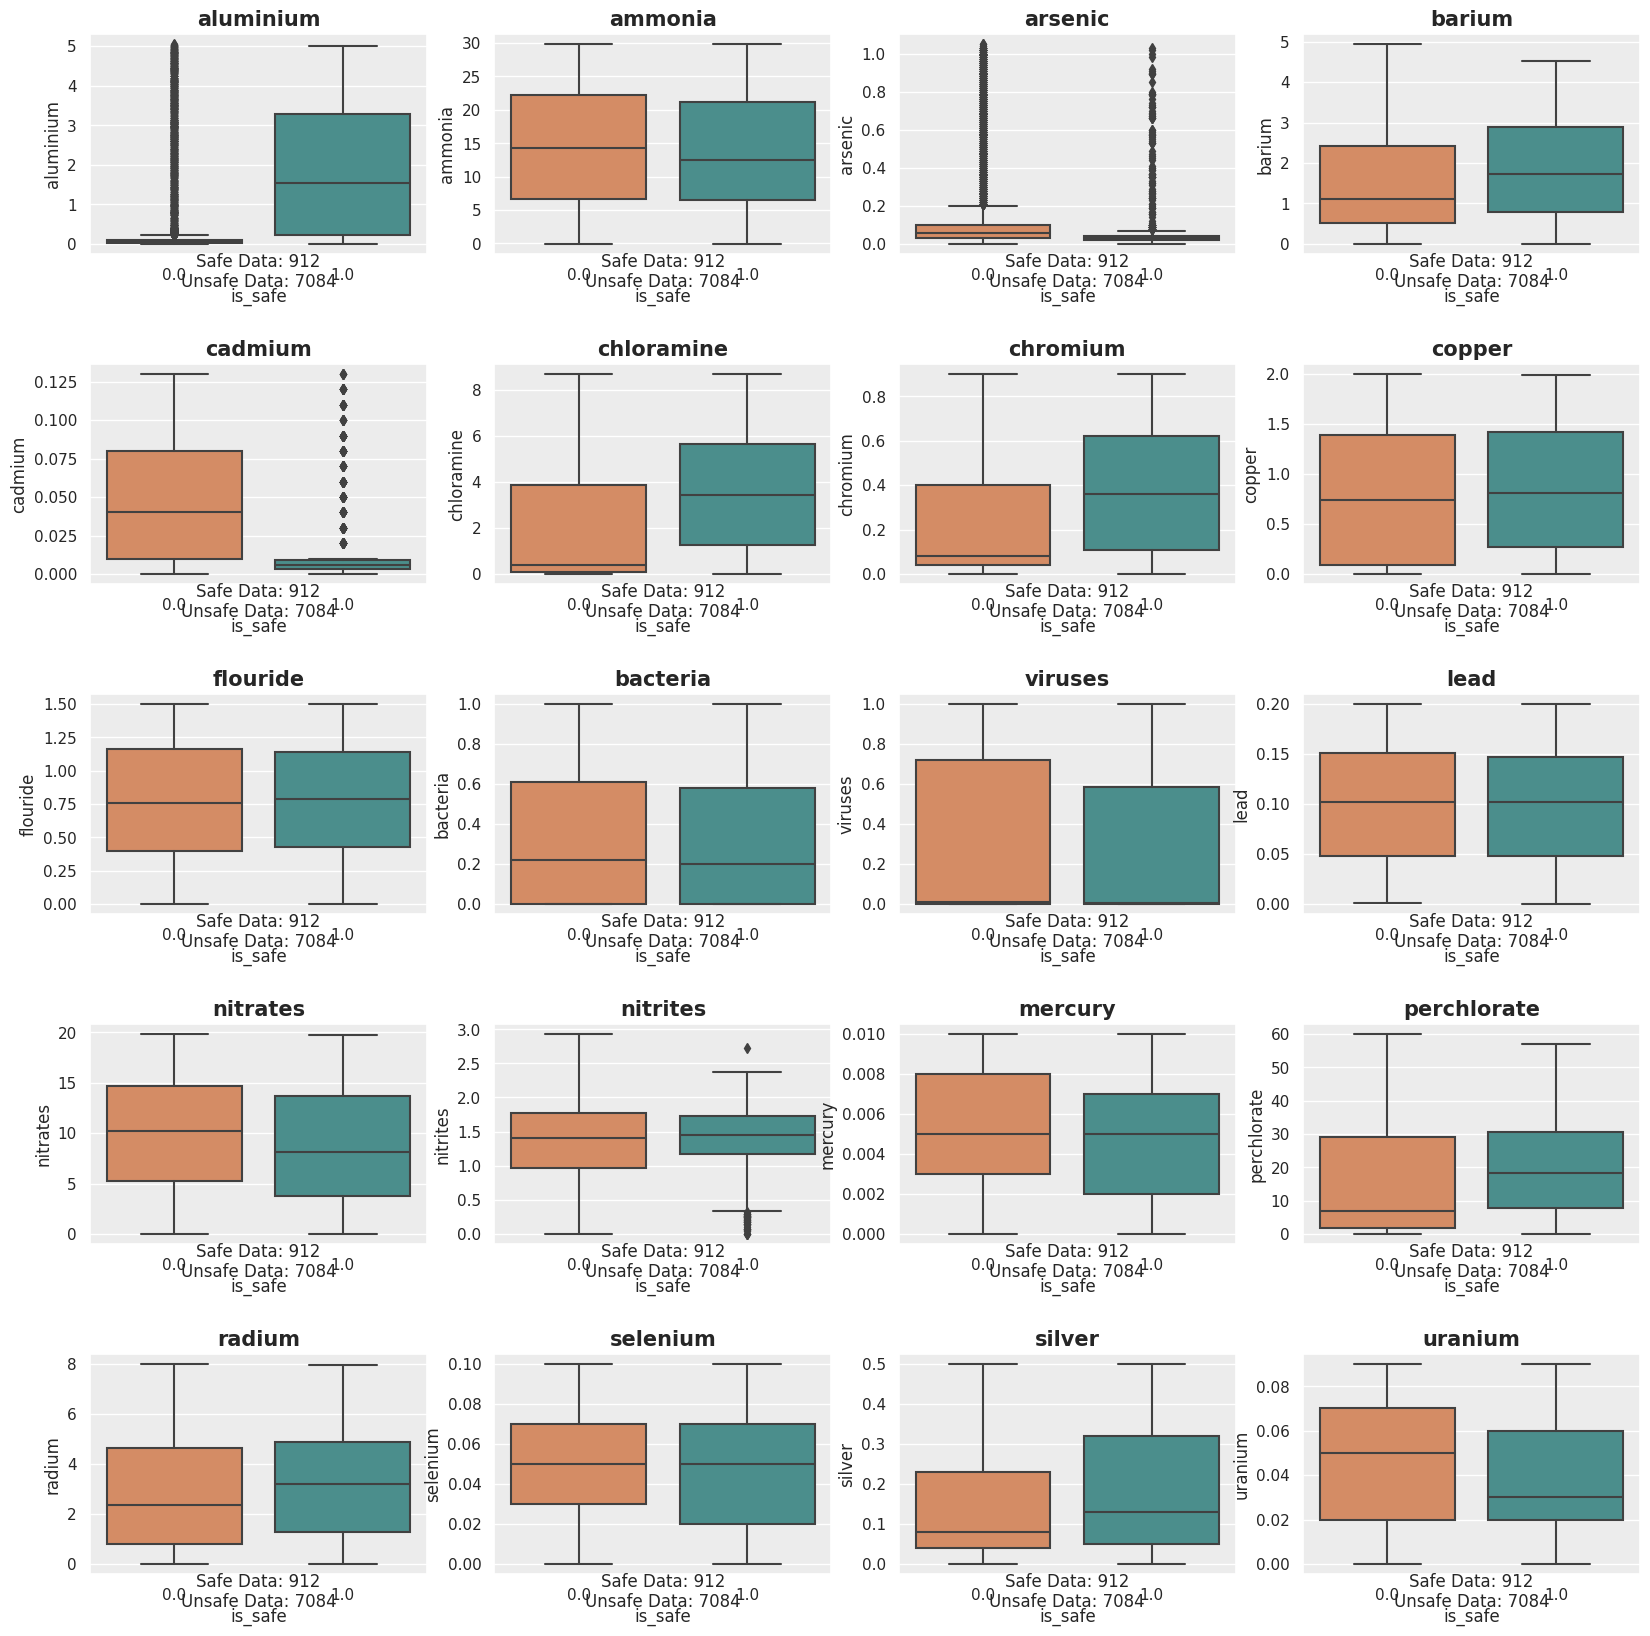

In [ ]:
#create a list of numerical features and plot them
list_of_num_features = dataset.loc[:, dataset.columns != 'is_safe']
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

fig, axes = plt.subplots(5, 4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(list_of_num_features):
    row = i // 4
    col = i % 4

    ax = axes[row, col]
    ax.set_title(feature, fontsize=15, fontweight='bold', ha='center')
    sns.boxplot(x=dataset['is_safe'], y=list_of_num_features[feature], data=dataset, palette=palette_features, ax=ax)

    # Add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)

    # Add label for data count based on "is_safe"
    count_safe = dataset[dataset['is_safe'] == 1][feature].count()
    count_unsafe = dataset[dataset['is_safe'] == 0][feature].count()
    ax.text(0.5, -0.15, f"Safe Data: {count_safe}\nUnsafe Data: {count_unsafe}", ha='center', transform=ax.transAxes)

plt.show()

In [ ]:
import plotly.express as px

count_data = dataset['is_safe'].value_counts()
labels = count_data.index.tolist()
sizes = count_data.values.tolist()

fig = px.pie(values=sizes, names=labels, title='Distribusi Label Data Safe dan Unsafe')
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()


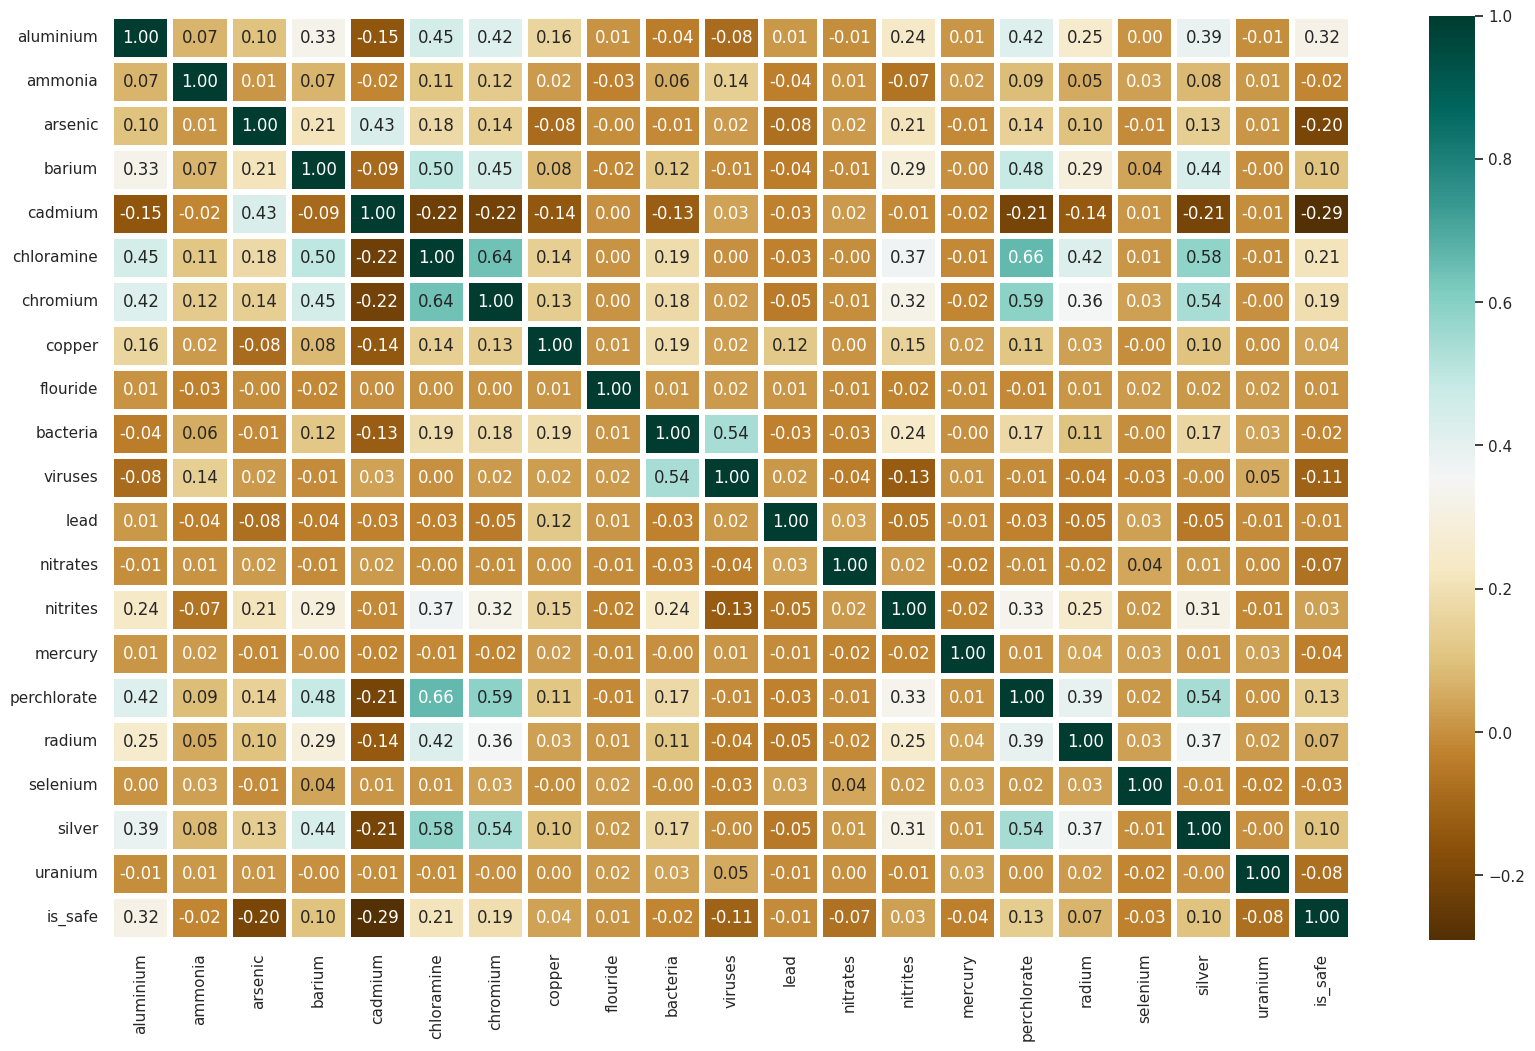

In [ ]:
# plotting correlation matrix to notice relationships or lack of it between variables
corr = dataset.corr(method='spearman')

plt.figure(figsize=(20, 12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=4, annot=True, fmt=".2f", cmap="BrBG")
plt.show()

In [ ]:
dataset.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [ ]:
X = dataset.drop(['is_safe'], axis=1).values
y = dataset['is_safe'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[ 0.77740287, -0.58549134, -0.48087476, ...,  1.05369443,
         1.33873624, -0.91704015],
       [ 1.30694501,  0.77511802, -0.59963176, ...,  1.05369443,
         0.85113427,  0.19802266],
       [ 0.27157158, -0.02908321, -0.48087476, ...,  0.70612871,
         2.03531047, -1.28872776],
       ...,
       [-0.45556091, -0.83666343, -0.63921743, ..., -1.72683135,
        -0.75098648,  0.19802266],
       [-0.51878982, -0.48186877, -0.59963176, ..., -1.72683135,
        -1.02961617, -1.66041536],
       [-0.49507898, -0.83666343, -0.59963176, ..., -1.72683135,
        -0.75098648,  0.19802266]])

In [ ]:
y

array([1., 1., 0., ..., 1., 1., 1.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Jumlah Data Untuk x_train : ", X_train.shape)
print("Jumlah Data Untuk y_train : ", y_train.shape)
print("Jumlah Data Untuk x_test  : ", X_test.shape)
print("Jumlah Data Untuk y_test  : ", y_test.shape)

Jumlah Data Untuk x_train :  (6396, 20)
Jumlah Data Untuk y_train :  (6396,)
Jumlah Data Untuk x_test  :  (1600, 20)
Jumlah Data Untuk y_test  :  (1600,)


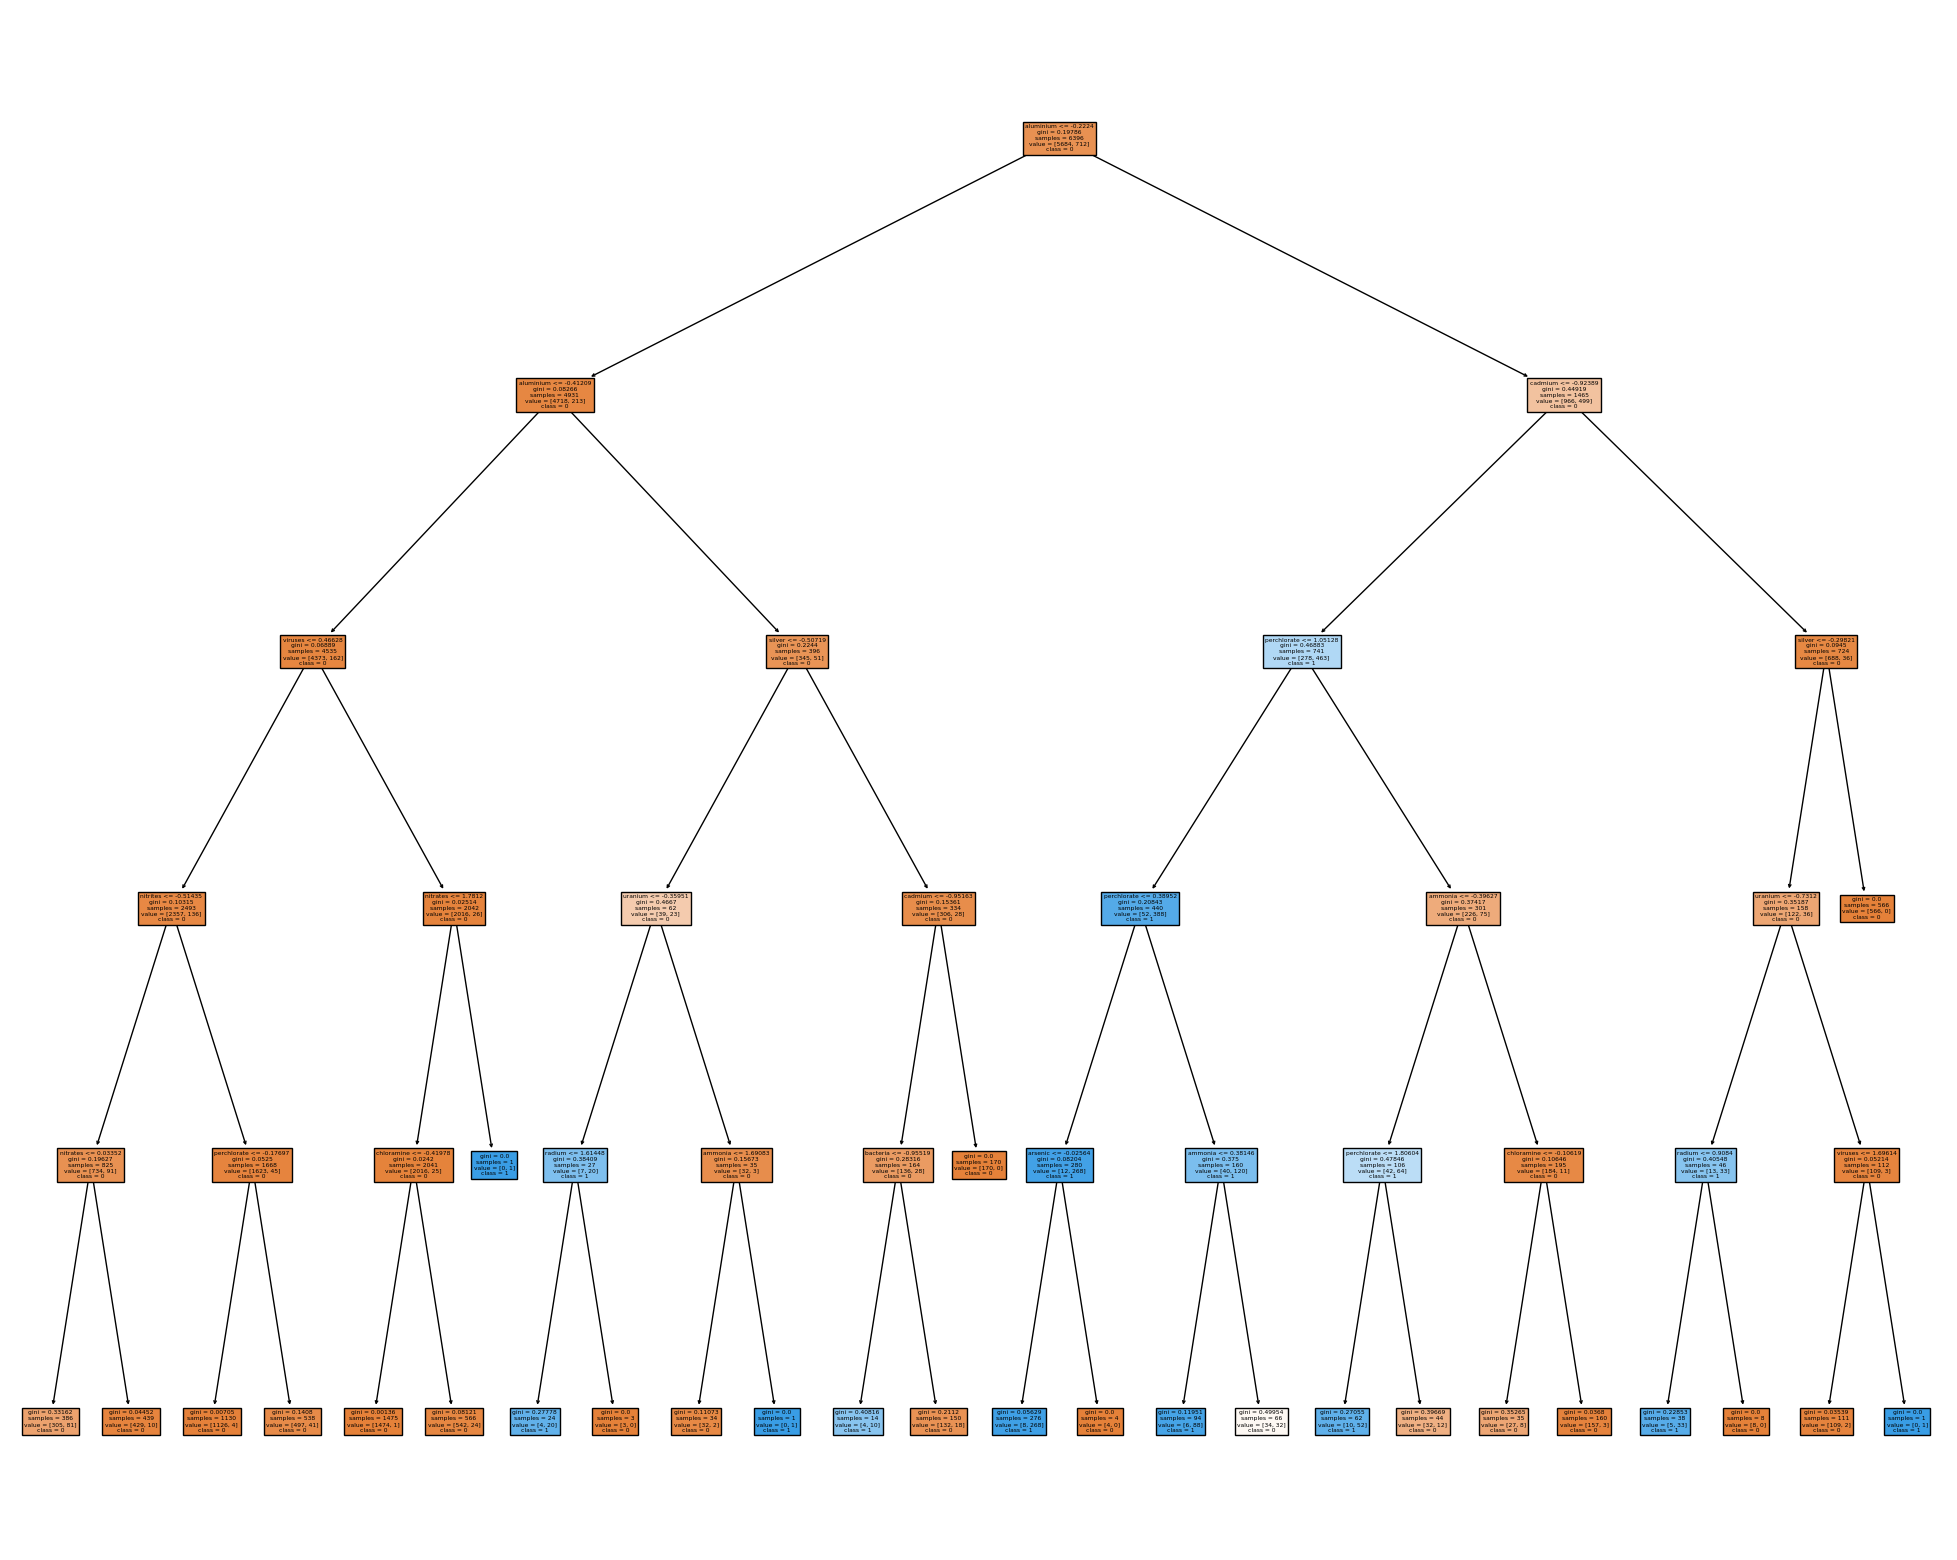



Training Model Performance Check
Accuracy Score 0.9570
F1 Score 0.9538
Precision Score 0.9560
Recall Score 0.9570


Testing Model Performance Check
Accuracy Score 0.9531
F1 Score 0.9497
Precision Score 0.9525
Recall Score : 0.9531


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)
training_prediction = model.predict(X_train)
testing_prediction = model.predict(X_test)

# Visualize Decision Tree
plt.figure(figsize = (25,20))
tree.plot_tree(model,
               feature_names =  dataset.columns.tolist()[:-1],
               class_names = ["0", "1"],
               filled = True,
               precision = 5)
plt.show()

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('\n')
print('Training Model Performance Check')
print('Accuracy Score {:.4f}'.format(training_accuracy))
print('F1 Score {:.4f}'.format(training_f1))
print('Precision Score {:.4f}'.format(training_precision))
print('Recall Score {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score {:.4f}'.format(testing_accuracy))
print('F1 Score {:.4f}'.format(testing_f1))
print('Precision Score {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 13, 15, 20],
    'min_samples_leaf': [1, 2, 4, 7, 9, 10],
}

# Create the Decision Tree classifier
model1 = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(model1, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model to make predictions on the test data
best_model = grid_search.best_estimator_
training_prediction1 = best_model.predict(X_train)
testing_prediction1 = best_model.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction1)
training_f1 = f1_score(y_train, training_prediction1, average = 'weighted')
training_precision = precision_score(y_train, training_prediction1, average = 'weighted')
training_recall = recall_score(y_train, training_prediction1, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction1)
testing_f1 = f1_score(y_test, testing_prediction1, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction1, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction1, average = 'weighted')

print('\n')
print('Training Model Performance Check')
print('Accuracy Score {:.4f}'.format(training_accuracy))
print('F1 Score {:.4f}'.format(training_f1))
print('Precision Score {:.4f}'.format(training_precision))
print('Recall Score {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score {:.4f}'.format(testing_accuracy))
print('F1 Score {:.4f}'.format(testing_f1))
print('Precision Score {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best Score: 0.9612271550039093


Training Model Performance Check
Accuracy Score 0.9767
F1 Score 0.9760
Precision Score 0.9763
Recall Score 0.9767


Testing Model Performance Check
Accuracy Score 0.9625
F1 Score 0.9612
Precision Score 0.9614
Recall Score : 0.9625


Dropdown(description='Number of Features:', index=3, options=(5, 10, 15, 20), style=DescriptionStyle(descripti…

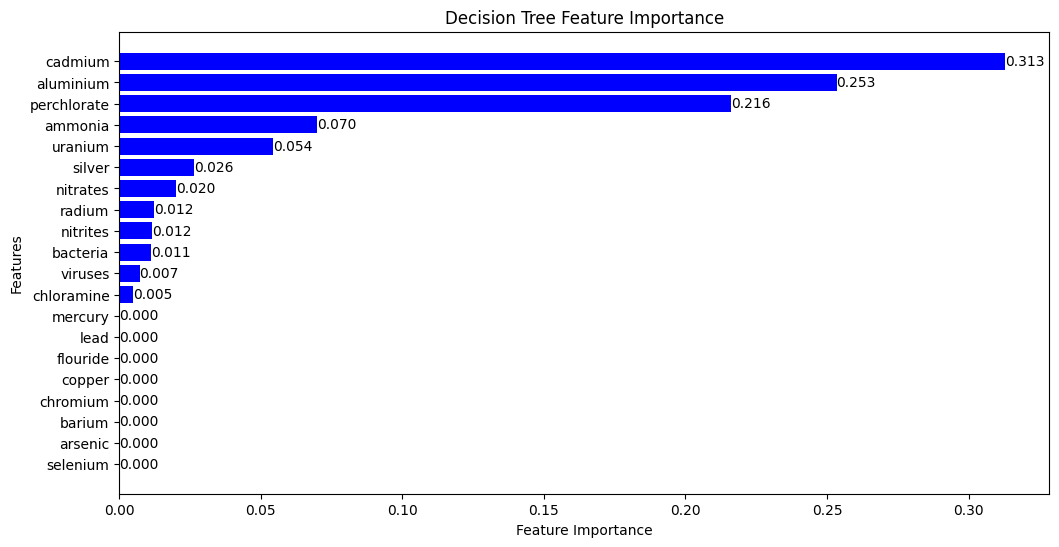

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import ipywidgets as widgets
from IPython.display import display

# Define a function to update the plot
def update_plot(num_features):
    # Get feature importances
    importances = model.feature_importances_
    features = np.array(list_of_num_features)

    # Sort feature importances in ascending order
    indices = np.argsort(importances)
    sorted_features = features[indices]
    sorted_importances = importances[indices]

    # Create bar plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.barh(range(num_features), sorted_importances[-num_features:], color='b', align='center')
    ax.set_yticks(range(num_features))
    ax.set_yticklabels(sorted_features[-num_features:])
    ax.set_xlabel('Feature Importance')
    ax.set_ylabel('Features')
    ax.set_title('Decision Tree Feature Importance')

    # Add labels to each bar
    for i, v in enumerate(sorted_importances[-num_features:]):
        ax.text(v, i, f"{v:.3f}", color='black', va='center')

    plt.show()

# Create a dropdown widget for selecting the number of features to display
num_features_dropdown = widgets.Dropdown(
    options=[5, 10, 15, 20],
    value=20,
    description='Number of Features:',
    style={'description_width': 'initial'}
)

# Define a function to handle the dropdown value change event
def dropdown_event_handler(change):
    num_features = change.new
    update_plot(num_features)

# Attach the event handler to the dropdown widget
num_features_dropdown.observe(dropdown_event_handler, names='value')

# Display the dropdown widget
display(num_features_dropdown)

# Initialize the plot
update_plot(num_features_dropdown.value)


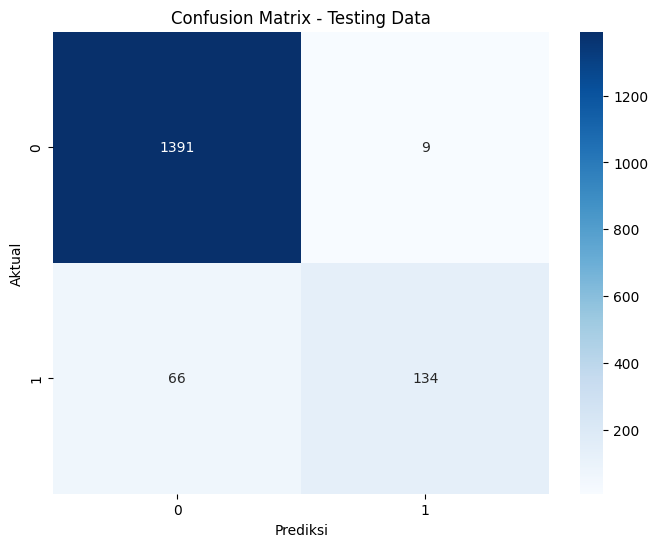

In [ ]:
# Membuat confusion matrix pada data testing
cm_test = confusion_matrix(y_test, testing_prediction)

# Membuat visualisasi confusion matrix pada data testing menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

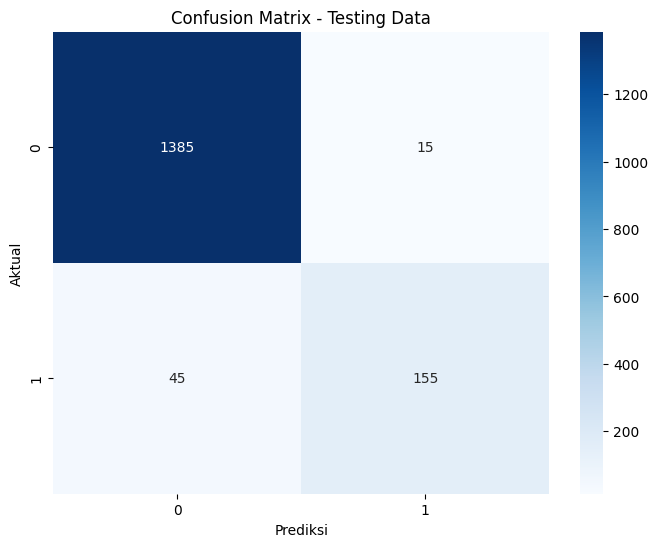

In [ ]:
# Membuat confusion matrix pada data testing
cm_test2 = confusion_matrix(y_test, testing_prediction1)

# Membuat visualisasi confusion matrix pada data testing menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
X = dataset.drop(['mercury', 'lead', 'flouride', 'copper', 'chromium', 'barium', 'arsenic', 'selenium', 'is_safe'], axis=1).values
y = dataset['is_safe'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[ 0.77740287, -0.58549134, -0.99324073, ...,  1.66184198,
         1.33873624, -0.91704015],
       [ 1.30694501,  0.77511802, -1.13194832, ...,  0.12481108,
         0.85113427,  0.19802266],
       [ 0.27157158, -0.02908321, -0.96549921, ...,  1.78669884,
         2.03531047, -1.28872776],
       ...,
       [-0.45556091, -0.83666343, -0.3551858 , ...,  0.8265927 ,
        -0.75098648,  0.19802266],
       [-0.51878982, -0.48186877, -1.18743136, ..., -1.2572251 ,
        -1.02961617, -1.66041536],
       [-0.49507898, -0.83666343, -0.3551858 , ...,  0.8265927 ,
        -0.75098648,  0.19802266]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 13, 15, 20],
    'min_samples_leaf': [1, 2, 4, 7, 9, 10],
}

# Create the Decision Tree classifier
model1 = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(model1, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model to make predictions on the test data
best_model = grid_search.best_estimator_
training_prediction1 = best_model.predict(X_train)
testing_prediction1 = best_model.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction1)
training_f1 = f1_score(y_train, training_prediction1, average = 'weighted')
training_precision = precision_score(y_train, training_prediction1, average = 'weighted')
training_recall = recall_score(y_train, training_prediction1, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction1)
testing_f1 = f1_score(y_test, testing_prediction1, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction1, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction1, average = 'weighted')

print('\n')
print('Training Model Performance Check')
print('Accuracy Score {:.4f}'.format(training_accuracy))
print('F1 Score {:.4f}'.format(training_f1))
print('Precision Score {:.4f}'.format(training_precision))
print('Recall Score {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score {:.4f}'.format(testing_accuracy))
print('F1 Score {:.4f}'.format(testing_f1))
print('Precision Score {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9475032032177397


Training Model Performance Check
Accuracy Score 1.0000
F1 Score 1.0000
Precision Score 1.0000
Recall Score 1.0000


Testing Model Performance Check
Accuracy Score 0.9531
F1 Score 0.9531
Precision Score 0.9533
Recall Score : 0.9531


In [ ]:
print(classification_report(y_test, testing_prediction1))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1420
           1       0.94      0.96      0.95      1414

    accuracy                           0.95      2834
   macro avg       0.95      0.95      0.95      2834
weighted avg       0.95      0.95      0.95      2834



In [ ]:
import joblib

# Save the best model to a file
joblib.dump(best_model, 'model_wq_dt.model')

['model_wq_dt.model']